In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import math as mt
from joblib import dump, load

import datetime

import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from sklearn.model_selection import train_test_split
from random import seed
from random import randint
import statistics
from scipy.stats import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [2]:
# Load X and y values
X = load('Obs_NormX.joblib') 
#X

y= load('Obs_y.joblib')
#y

Accuracy of base Linear Regression model is , 0.7081666470542085


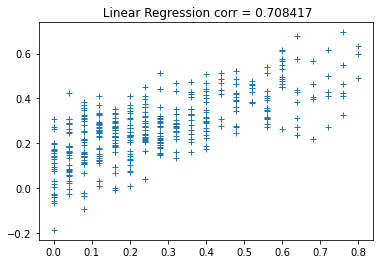

In [3]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)
regLin=LinearRegression().fit(X_train, y_train)
acc_svr       = round(regLin.score(X_test, y_test) * 100, 2)
print("Accuracy of base Linear Regression model is ,",(acc_svr/100)**0.5)
yy_test = regLin.predict(X_test)
test_corr = np.corrcoef(yy_test,y_test)[0,1]
plt.title(' Linear Regression corr = %f'%test_corr)
plt.plot(y_test,yy_test,'+')

# test on 2011-2018 Data

In [4]:
# Load X and y values
Xt = load('Obs_NormX_2011-2018.joblib') 
#X

yt= load('Obs_y_2011-2018.joblib')
#y

In [5]:
regLin=LinearRegression().fit(X, y)


Accuracy of base Linear Regression model is , 0.6219324722186484


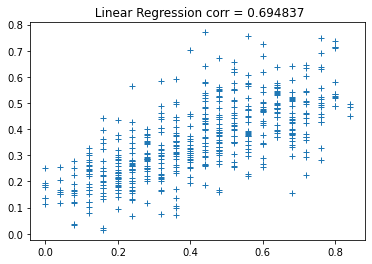

In [6]:
yPred = regLin.predict(Xt)
testcorr = np.corrcoef(yPred,yt)[0,1]
acc_svr       = round(regLin.score(Xt, yt) * 100, 2)
print("Accuracy of base Linear Regression model is ,",(acc_svr/100)**0.5)
plt.title(' Linear Regression corr = %f'%testcorr)
plt.plot(yt,yPred,'+')

# Fog Statistics 

In [7]:
y

<xarray.DataArray 'fogdata' (time: 1922)>
array([0.32, 0.4 , 0.4 , ..., 0.28, 0.2 , 0.24])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2010-12-31

In [8]:
yLR=regLin.predict(X)

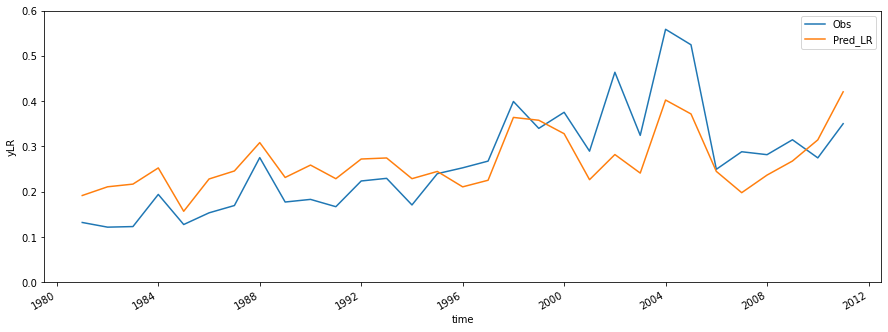

In [9]:
y_predLin_ds=xr.Dataset({'yLR': (('time'), yLR)}, coords={'time': y.time})
dump(y_predLin_ds.yLR,'TS1dataLR.joblib')
plt.figure(figsize=[15,5])
y.resample(time='1Y').mean().plot(label='Obs')
y_predLin_ds.resample(time='1Y').mean().yLR.plot(label='Pred_LR')
plt.ylim(0, 0.6)
plt.legend()

plt.savefig('../obs_yearly_LinearRegression.jpeg',dpi=300)

In [10]:
ynf=y.where(y<0.040, drop=True)
print(ynf.shape[0])

yint1=y.where(y>=0.04,drop=True)
yintf=yint1.where(yint1<0.48,drop=True)
print(yintf.shape[0])

yWd=y.where(y>=0.48, drop=True)
print(yWd.shape[0])

yLRnf=y_predLin_ds.where(y_predLin_ds.yLR<0.04,drop=True)
print(yLRnf.yLR.shape[0])

yLRint1=y_predLin_ds.where(y_predLin_ds.yLR>=0.04,drop=True)
yLRintf=yLRint1.where(yLRint1<0.48,drop=True)
print(yLRintf.yLR.shape[0])

yLRWd=y_predLin_ds.where(y_predLin_ds.yLR>=0.48,drop=True)
print(yLRWd.yLR.shape[0])

117
1442
363
84
1699
139


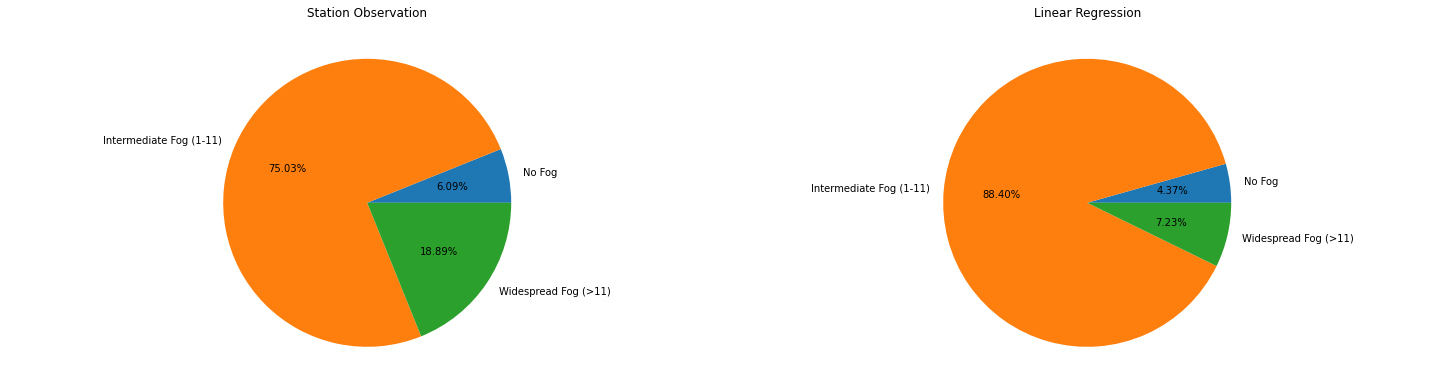

In [11]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [ynf.shape[0],yintf.shape[0],yWd.shape[0]]
ax.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax.set_title('Station Observation')
ax1 = fig.add_axes([1,0,1,1])
ax1.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [yLRnf.yLR.shape[0],yLRintf.yLR.shape[0],yLRWd.yLR.shape[0]]
ax1.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('Linear Regression')
fig.savefig('../StationLRP1.jpeg',dpi=100)

In [12]:
pie1dataObs = [ynf.shape[0],yintf.shape[0],yWd.shape[0]]
pie1dataLR = [yLRnf.yLR.shape[0],yLRintf.yLR.shape[0],yLRWd.yLR.shape[0]]
dump(pie1dataObs, 'pie1dataObs.joblib') 
dump(pie1dataLR,'pie1dataLR.joblib')

['pie1dataLR.joblib']

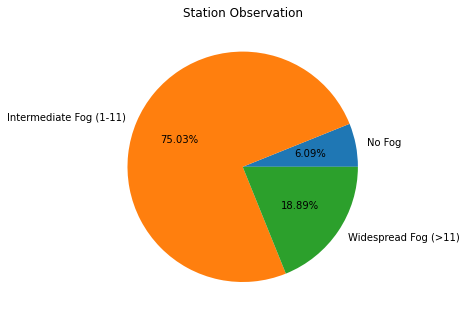

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [ynf.shape[0],yintf.shape[0],yWd.shape[0]]
ax.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax.set_title('Station Observation')
plt.savefig('../StationP1.jpeg',dpi=300)

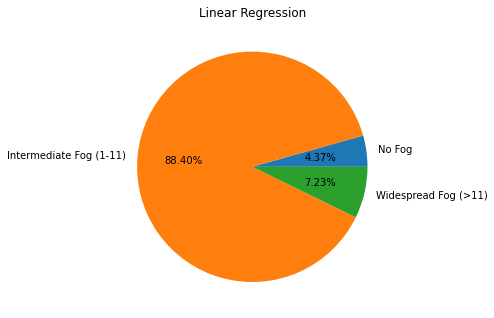

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [yLRnf.yLR.shape[0],yLRintf.yLR.shape[0],yLRWd.yLR.shape[0]]
ax1.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('Linear Regression')
plt.savefig('../LRP1.jpeg',dpi=100)

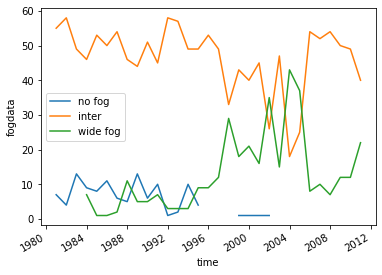

In [15]:
ynf.resample(time='1Y').count().plot(label='no fog')
yintf.resample(time='1Y').count().plot(label='inter')
yWd.resample(time='1Y').count().plot(label='wide fog')
plt.legend()

In [16]:
noFogCounts=np.nan_to_num(ynf.resample(time='1Y').count(), copy=True, nan=0.0, posinf=None, neginf=None)
interFogCounts=yintf.resample(time='1Y').count()
wdFogCounts=yWd.resample(time='1Y').count()


#noFogCountsLR=np.nan_to_num(yLRnf.resample(time='1Y').count(), copy=True, nan=0.0, posinf=None, neginf=None)
noFogCountsLR=0
interFogCountsLR=yLRintf.resample(time='1Y').count()
wdFogCountsLR=np.nan_to_num(yLRWd.yLR.resample(time='1Y').count(), copy=True, nan=0.0, posinf=None, neginf=None)

In [17]:
wdFogCountsLR

array([ 2.,  0.,  2.,  1.,  0.,  1.,  0.,  2.,  0.,  5.,  5.,  1.,  0.,
        0.,  2.,  1.,  1., 21., 18.,  9.,  1.,  5.,  1., 21., 14.,  0.,
        0.,  0.,  2.,  1., 23.])

Text(0.5, 1.0, 'Linear Regression')

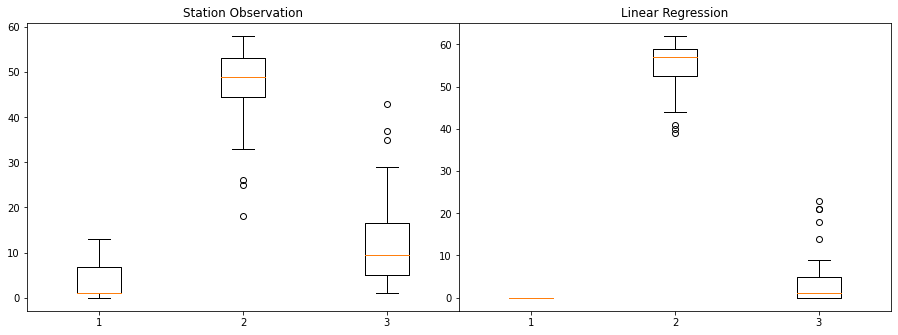

In [18]:
data = [noFogCounts, interFogCounts, wdFogCounts]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.boxplot(data)
ax.set_title('Station Observation')

dataLR = [noFogCountsLR, interFogCountsLR.yLR, wdFogCountsLR]
ax1 = fig.add_axes([1,0,1,1])
ax1.boxplot(dataLR)
ax1.set_title('Linear Regression')

# Test Data 2011-2018

In [19]:
yLRt=regLin.predict(Xt)

In [20]:
#dump(yLRt,'TS2dataLR.joblib')

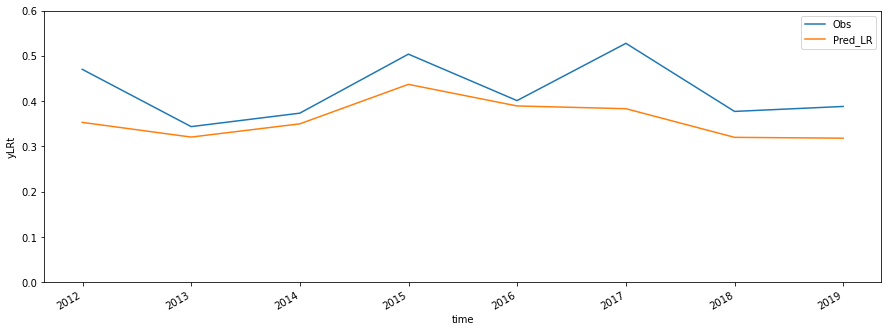

In [21]:
y_predLin_dst=xr.Dataset({'yLRt': (('time'), yLRt)}, coords={'time': yt.time})
dump(y_predLin_dst.yLRt,'TS2dataLR.joblib')
plt.figure(figsize=[15,5])
yt.resample(time='1Y').mean().plot(label='Obs')
y_predLin_dst.resample(time='1Y').mean().yLRt.plot(label='Pred_LR')
plt.ylim(0, 0.6)
plt.legend()

plt.savefig('../obs_yearly_LinearRegression_2015-2018.jpeg',dpi=300)

In [22]:
ynft=yt.where(yt<0.040, drop=True)
print(ynft.shape[0])

yint1t=yt.where(yt>=0.04,drop=True)
yintft=yint1t.where(yint1t<0.48,drop=True)
print(yintft.shape[0])

yWdt=yt.where(yt>=0.48, drop=True)
print(yWdt.shape[0])

yLRnft=y_predLin_dst.where(y_predLin_dst.yLRt<0.04,drop=True)
print(yLRnft.yLRt.shape[0])

yLRint1t=y_predLin_dst.where(y_predLin_dst.yLRt>=0.04,drop=True)
yLRintft=yLRint1t.where(yLRint1t<0.48,drop=True)
print(yLRintft.yLRt.shape[0])

yLRWdt=y_predLin_dst.where(y_predLin_dst.yLRt>=0.48,drop=True)
print(yLRWdt.yLRt.shape[0])

8
263
225
4
384
108


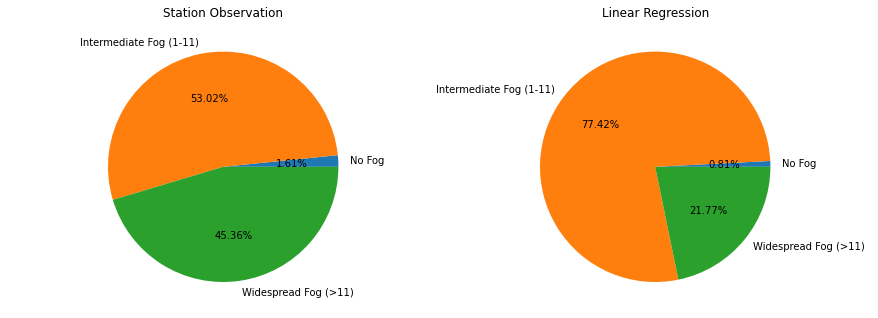

In [23]:


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [ynft.shape[0],yintft.shape[0],yWdt.shape[0]]
ax.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax.set_title('Station Observation')

ax1 = fig.add_axes([1,0,1,1])
ax1.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [yLRnft.yLRt.shape[0],yLRintft.yLRt.shape[0],yLRWdt.yLRt.shape[0]]
ax1.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('Linear Regression')
plt.show()




In [24]:
pie1dataObs = [ynft.shape[0],yintft.shape[0],yWdt.shape[0]]
pie1dataLR = [yLRnft.yLRt.shape[0],yLRintft.yLRt.shape[0],yLRWdt.yLRt.shape[0]]
dump(pie1dataObs, 'pie2dataObs.joblib') 
dump(pie1dataLR,'pie2dataLR.joblib')

['pie2dataLR.joblib']